In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [2]:
train_dir = r'C:\Datascience\Workspace\train'
test_dir = r'C:\Datascience\Workspace\test'

# Preprocessing and augmenting training images
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Preprocessing test images (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'  # cats vs dogs: binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [3]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and fully connected layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Binary output (0: cat, 1: dog)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


c:\Users\amala\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 486ms/step - accuracy: 0.5439 - loss: 0.6951 - val_accuracy: 0.4922 - val_loss: 0.6936
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.3125 - loss: 0.7031 - val_accuracy: 0.4844 - val_loss: 0.6939
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 464ms/step - accuracy: 0.4985 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4375 - loss: 0.7160 - val_accuracy: 0.5234 - val_loss: 0.6917
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 33s 975ms/step - accuracy: 0.5099 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.6154 - loss: 0.6891 - val_accuracy: 0.5078 - val_loss: 0.6930
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 34s 848ms/step - accuracy: 0.5160 - loss: 0.6910 - val_accuracy: 0.5703 - val_loss: 0.7062
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.5000 - loss: 0.7021 - val_accuracy: 0.

In [6]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}')


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.6100 - loss: 0.7266
Test accuracy: 0.6015625


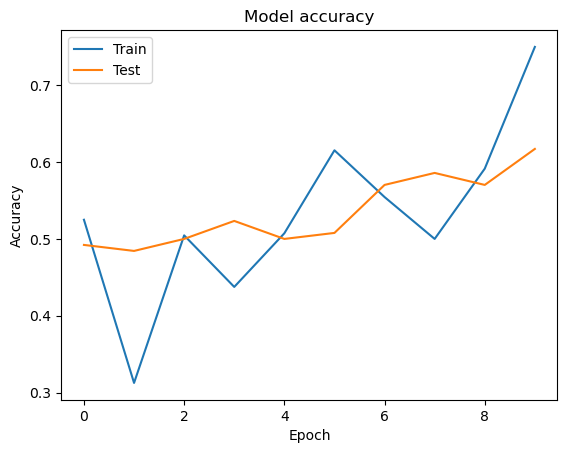

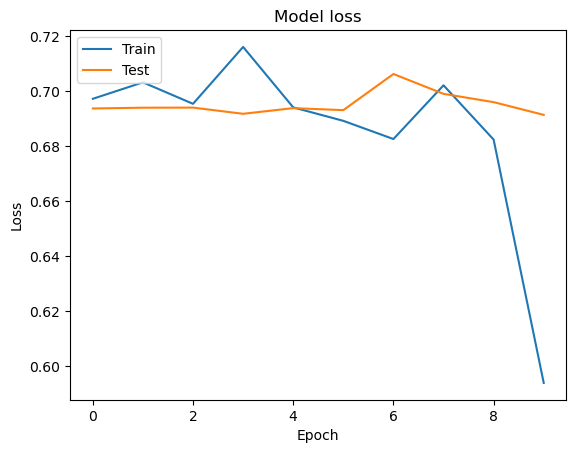

In [7]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [8]:
# Save the model as an HDF5 file
model.save('dogs_vs_cats.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


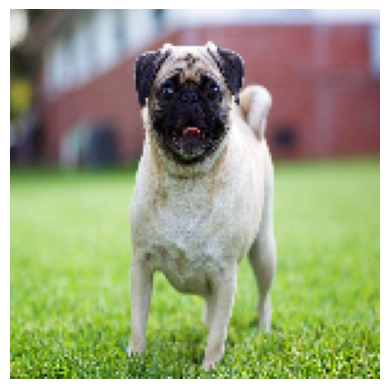

It's a Dog!


In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = r'C:\Datascience\Workspace\train\dogs\dog_21.jpg'  # Provide the path to the image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)

# Display the image
plt.imshow(img)  # Show the image
plt.axis('off')  # Turn off axis for better display
plt.show()

# Print prediction result
if prediction[0] > 0.5:
    print("It's a Dog!")
else:
    print("It's a Cat!")
